# Tutorial 1

# Supervised and Unsupervised Learning

In [1]:
# import the pandas the library
import pandas as pd

In [2]:
# Import thi slibrary to suppress the warnings
import warnings
warnings.filterwarnings('ignore')   # The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings

## Abstract: 
This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form available at UCI machine learning repository. 
- Machine Learning Question:
How can we predict survival chances of patients based on the heart attack dataset accuratley using supervised machine learning model?

In [3]:
# import the file for heart failure
df_heart = pd.read_csv('heart_records.csv')

In [4]:
# Display first 5 records
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Rename the columns in the Dataframe, 'df_heart'
df_heart.rename(columns = ({'creatinine_phosphokinase': 'CP', 'high_blood_pressure': 'HBP', 'serum_creatinine': 'SC'}), 
                inplace=True)

In [6]:
# Display last 5 records
df_heart.head()

,age,anaemia,CP,diabetes,ejection_fraction,HBP,platelets,SC,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
# Store the column 'DEATH_EVENT' in 'label'
label = df_heart[['DEATH_EVENT']]

# Display first 5 records
label.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [10]:
# Drop the label column (Last)
df_new = df_heart.drop(['DEATH_EVENT'], axis = 1)

# axis = 1 means along columnwise

In [12]:
# Display last 5 records
df_new.head()

,age,anaemia,CP,diabetes,ejection_fraction,HBP,platelets,SC,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [13]:
# Store the values as X and y before the applying the ML model
# For machine learning model, we need to split the data into independent and dependent variables

X = df_new           # Features (independent variables) from the heart dataset

y = label            # Target variable (DEATH_EVENT) for the prediction

# Regarding the dataset 
# The survived patients (death event = 0) are 203, while the dead patients (death event = 1) are 96

In [14]:
# Display the label variables of binary types
y.value_counts()

DEATH_EVENT
0              203
1               96
dtype: int64

## Splitting Data into Training and Testing

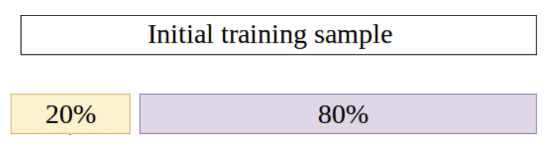

In [14]:
from IPython.display import Image
Image(filename =r'Image1.png')

In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 38) # 80% training and 20% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # 80% training and 20% test
# Controls the shuffling applied to the data before applying the split.

In [16]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (299, 12) (299, 1)
Number of rows and columns after splitting dataset:  (239, 12) (60, 12) (239, 1) (60, 1)


## Generating The Model
To generate the model, we import the SVM module from sklearn to create a support vector classifier in svc() by passing the argument kernel as the linear kernel. Then we train the data-set using the set() and make predictions using the predict() function.

In [17]:
# Import the library for the model named as 'SVM'
from sklearn import svm

# Create a classifier
cls_svm = svm.SVC(kernel = "linear")    # Press shift + tab key simultaneously to get the help for the function or method SVC

# Train the model
cls_svm.fit(X_train, y_train)

# Predict the response
y_pred = cls_svm.predict(X_test)

## Evaluating the Model
With this, we can predict how accurately the model or classifier can predict if the patient has heart disease or not. So we will calculate the accuracy score, recall, and precision for our evaluation.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

Suppose a computer program for recognizing dogs (the relevant element) in a digitalized collection of photographs. When the query is executed, the computer program identifies <b>eight dogs</b> in a picture containing <b>ten cats</b> and <b>twelve dogs</b>, and of the <b>eight</b> it identifies as dogs, five actually are dogs (true positives), while the other three are cats (false positives). Seven dogs were missed (false negatives), and seven cats were correctly excluded (true negatives). The program's precision is then 5/8 (true positives / selected elements) while its recall is 5/12 (true positives / relevant elements).

https://en.wikipedia.org/wiki/Precision_and_recall

In [18]:
# Import the library for accuracy, precision and recall
from sklearn import metrics

# accuracy
print("accuracy:", metrics.accuracy_score(y_test, y_pred))

# precision score
print("precision:", metrics.precision_score(y_test, y_pred))

# recall score
print("recall" , metrics.recall_score(y_test, y_pred))

# Display upto 2 decimal places
print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

accuracy: 0.7833333333333333
precision: 0.8571428571428571
recall 0.5217391304347826
accuracy: 0.78
precision: 0.86
recall: 0.52


<AxesSubplot:>

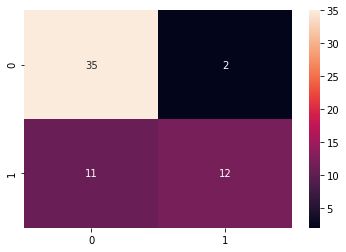

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = cls_svm.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

### What does the confusion_matrix information result mean?
We had 60 patients for the testing (y_test). 35 patients predicted as survived (0) due to heart attack, 11 were classified as not survived (1) but actually they survived (type II error). 12 patients predicted to have heart attack (not survived), 2 were classified as survived due to heart attack although they not survived (type I error).

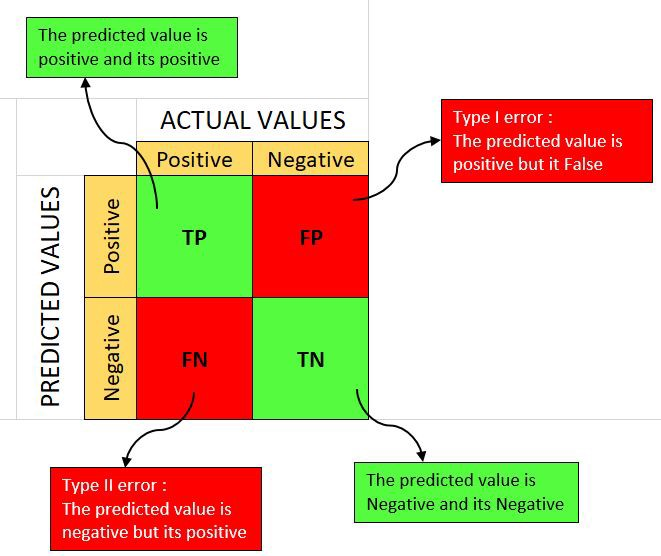

In [29]:
from IPython.display import Image
Image(filename =r'Image2.png')
# https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

### Task 1: 
Update the code when the data is splitted for the four different types. Develop the table for four different splittings (5%, 10%, 30%, 40%) for acuracy, precision and recall in the word document. Check any significant changes observed in the accuracy, precision and recall. 

### Task 2:
If you change the random_state = 38 in the code to random_state = 102, What changes you have observed in the acuracy, precision and recall. 

### Task 3:
Understand and Explain the confusion matrix in your own words. 

# Unsupervised Learning
## Clustering

In [51]:
# import the libraries for clustering make_blobs and KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic two-dimensional data using make_blob() function
X, y = make_blobs(random_state = 1)

# Build the clustering model using KMeans
kmeans = KMeans(n_clusters = 3)

# Train the model by calling a method 'fit()'
kmeans.fit(X)

KMeans(n_clusters=3)

In [40]:
# print(X)

In [44]:
# Display the labels
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [45]:
# Predict the values based on X data frame
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


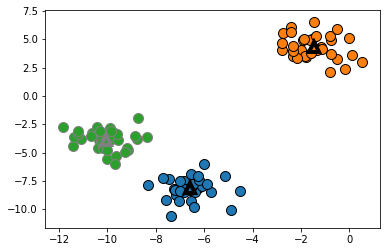

In [52]:
# import mglearn library
import mglearn

# call the method discrete_scatter
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

# Display the cluster centers using additional arguments in the discrete_scatter plot method (function) 
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],     
    [0, 1, 2], 
    markers = '^', 
    markeredgewidth = 4
)

### Task 4: 
Modify the unsupervised learning part of the code for clustering to draw 4 clusters.

## Reference:
- https://archive.ics.uci.edu/ml/datasets/statlog+(heart)
- Introduction to Machine Learning with Python, Andreas C. Müller, Sarah Guido, O'Reilly Media, Inc., 2016, ISBN: 9781449369415.
- https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5